In [72]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện xử lý dữ liệu ngày tháng
import datetime

# Thư viện xử lý mô hình học máy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Tắt cảnh báo để code chạy gọn hơn
import warnings
warnings.filterwarnings("ignore")

print("Các thư viện đã được import thành công!")

Các thư viện đã được import thành công!


# 1. ĐỌC DỮ LIỆU

In [73]:
## Đọc dữ liệu diện tích từ file .csv
data2 = pd.read_csv('DATA_ĐỒ ÁN/melb_data.csv')
data2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [74]:
#xác định các đặc trưng thống kê của thuộc tính số:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

 **MÔ TẢ CÁC THUỘC TÍNH**
 
 0.   Suburb  : Khu vực ngoại ô, vùng ven thành phố      
 1.   Address : địa chỉ cụ thể của bất động sản       
 2.   Rooms   : Số lượng phòng     
 3.   Type (loại hình bất động sản) : h - nhà, nhà gỗ, biệt thự, nhà song lập, nhà liền kề; u - căn hộ, nhà thông tầng; t - nhà phố.
 4.   Price   : Giá nhà bằng đô la     
 5.   Method  : S - bất động sản đã bán; SP - bất động sản đã bán trước đó; PI - bất động sản đã chuyển giao; VB - giá thầu của người bán; SA - đã bán sau khi đấu giá.
 6.   SellerG  : Đại lý bất động sản     
 7.   Date     : ngày bán    
 8.   Distance : khoảng cách đến trung tâm thành phố   
 9.   Postcode : Mã bưu điện ở khu vực bất động sản    
 10.  Bedroom2 : phòng ngủ     
 11.  Bathroom : số lượng phòng tắm     
 12.  Car      : số lượng chỗ đậu xe      
 13.  Landsize : diện tích đất đai     
 14.  BuildingArea  : diện tích xây dựng
 15.  YearBuilt     : năm xây dựng 
 16.  CouncilArea   : Hội dồng quản lý khu vực hành chính
 17.  Lattitude     : vĩ độ địa lý của bất động sản
 18.  Longtitude    : kinh độ địa lý của bất động sản
 19.  Regionname    : Vùng địa lý 
 20.  Propertycount : số lượng bất động sản hiện có

In [75]:
#hiển thị tất cả thông tin đặc trưng thống kê:
data2.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,...,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,...,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,...,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,...,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,...,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


In [76]:
#xác định các đặc trưng thống kê của thuộc tính số:
data2.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# 2 TÍNH TOÁN CÁC ĐẶC TRƯNG THỐNG KÊ

**A. Với các thuộc tính định tính**

1. Suburb: Tên khu vực ngoại ô.
2. Address: Địa chỉ cụ thể.
3. Type: Loại hình bất động sản (h, u, t).
4. Method: Phương thức bán bất động sản (S, SP, PI, VB, SA).
5. SellerG: Tên/mã đại lý bất động sản.
6. CouncilArea: Tên hội đồng quản lý khu vực.
7. Regionname: Tên vùng địa lý.

**Dữ liệu định tính**
- Dữ liệu định danh: Suburb, address, Type, Method, Postcode, Regionname, CouncilArea
- Dữ liệu nhị phân: Không có
- Dữ liệu trật tự: Không có

In [77]:
#Xác định số lượng theo từng giá trị Suburb
giatri1 = data2['Suburb'].value_counts()
print(giatri1)

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64


In [78]:
#Xác định số lượng theo từng giá trị address
giatri2 = data2['Suburb'].value_counts()
print(giatri2)

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64


In [79]:
#Xác định số lượng theo từng giá trị Type
giatri3 = data2['Type'].value_counts()
print(giatri3)

h    9449
u    3017
t    1114
Name: Type, dtype: int64


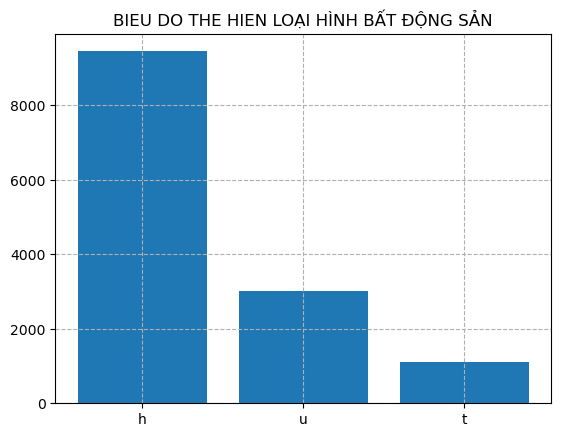

In [125]:
#Trực quan hóa dữ liệu: 
plt.bar(giatri3.index,
        giatri3.values)

plt.grid(ls='--')#hieen thi luwoi
plt.title('BIEU DO THE HIEN LOẠI HÌNH BẤT ĐỘNG SẢN')
plt.show()

In [80]:
#Xác định số lượng theo từng giá trị Method
giatri4 = data2['Method'].value_counts()
print(giatri4)

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64


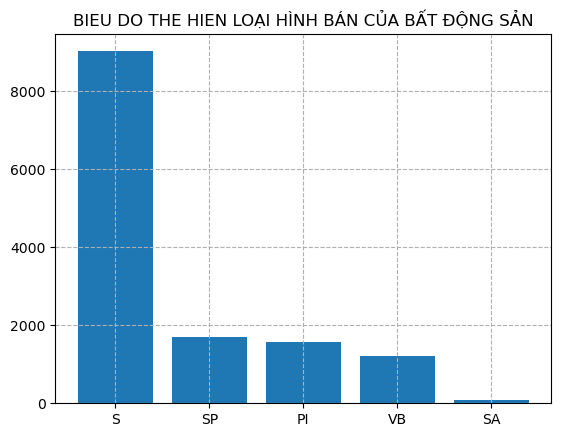

In [143]:
#Trực quan hóa dữ liệu: 
plt.bar(giatri4.index,
        giatri4.values)

plt.grid(ls='--')#hieen thi luwoi
plt.title('BIEU DO THE HIEN LOẠI HÌNH BÁN CỦA BẤT ĐỘNG SẢN')
plt.show()

In [81]:
#Xác định số lượng theo từng giá trị SellerG
giatri5 = data2['SellerG'].value_counts()
print(giatri5)

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64


In [82]:
#Xác định số lượng theo từng giá trị CouncilArea
giatri6 = data2['CouncilArea'].value_counts()
print(giatri6)

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64


In [83]:
#Xác định số lượng theo từng giá trị Regionname
giatri7 = data2['Regionname'].value_counts()
print(giatri7)

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64


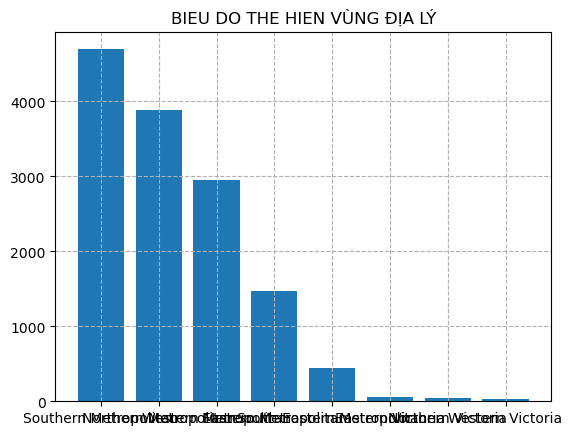

In [141]:
#Trực quan hóa dữ liệu: 
plt.bar(giatri7.index,
        giatri7.values)

plt.grid(ls='--')#hieen thi luwoi
plt.title('BIEU DO THE HIEN VÙNG ĐỊA LÝ')
plt.show()

**B. Với các thuộc tính định lượng**

1. Rooms: Số lượng phòng.
2. Price: Giá nhà
3. Distance: Khoảng cách đến trung tâm thành phố
4. Bedroom2 (Bedroom): Số lượng phòng ngủ.
5. Bathroom: Số lượng phòng tắm.
6. Car: Số lượng chỗ đậu xe.
7. Landsize: Diện tích đất đai
8. BuildingArea: Diện tích xây dựng
9. YearBuilt: Năm xây dựng
10. Lattitude: Vĩ độ
11. Longtitude: Kinh độ
12. Propertycount: Số lượng bất động sản hiện có
13. Date: ngày bán

**Dữ liệu định lượng**
- Dữ liệu rời rạc: Rooms, Bedroom2 (Bedroom), Bathroom, Car, YearBuilt, Propertycount.
- Dữ liệu liên tục:Price, Distance, Landsize, BuildingArea, Lattitude, Longtitude, Date.

In [84]:
#mô tả thống kê thuộc tính: Rooms
data2['Rooms'].describe()

count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64

In [85]:
#mô tả thống kê thuộc tính: Price
data2['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [86]:
#mô tả thống kê thuộc tính: Distance
data2['Distance'].describe()

count    13580.000000
mean        10.137776
std          5.868725
min          0.000000
25%          6.100000
50%          9.200000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64

In [87]:
#mô tả thống kê thuộc tính: Bedroom2 
data2['Bedroom2'].describe()

count    13580.000000
mean         2.914728
std          0.965921
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: Bedroom2, dtype: float64

In [88]:
# mô tả thống kê thuộc tính: Bathroom
data2['Bathroom'].describe()

count    13580.000000
mean         1.534242
std          0.691712
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Bathroom, dtype: float64

In [89]:
#mô tả thống kê thuộc tính: Car
data2['Car'].describe()

count    13518.000000
mean         1.610075
std          0.962634
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Car, dtype: float64

In [90]:
#mô tả thống kê thuộc tính: Landsize
data2['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [91]:
#mô tả thống kê thuộc tính: BuildingArea
data2['BuildingArea'].describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [92]:
#mô tả thống kê thuộc tính: YearBuilt
data2['YearBuilt'].describe()

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [93]:
#mô tả thống kê thuộc tính: Lattitude
data2['Lattitude'].describe()

count    13580.000000
mean       -37.809203
std          0.079260
min        -38.182550
25%        -37.856822
50%        -37.802355
75%        -37.756400
max        -37.408530
Name: Lattitude, dtype: float64

In [94]:
#mô tả thống kê thuộc tính: Longtitude
data2['Longtitude'].describe()

count    13580.000000
mean       144.995216
std          0.103916
min        144.431810
25%        144.929600
50%        145.000100
75%        145.058305
max        145.526350
Name: Longtitude, dtype: float64

In [95]:
#mô tả thống kê thuộc tính: Propertycount
data2['Propertycount'].describe()

count    13580.000000
mean      7454.417378
std       4378.581772
min        249.000000
25%       4380.000000
50%       6555.000000
75%      10331.000000
max      21650.000000
Name: Propertycount, dtype: float64

# 3. LÀM SẠCH DỮ LIỆU

In [96]:
#Tạo bản sao dữ liệu:
data_1= data2.copy()

**3.1. Kiểm tra và làm sạch dữ liệu bị missing**

In [97]:
#Thống kê số lượng missing theo từng thuộc tính:
data_1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

 **3.1.1 Thuộc tính "Car"**

In [98]:
#1. Liệt kê các dòng missing 
data_1[data_1['Car'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,...,1.0,NaN,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,...,1.0,NaN,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,...,2.0,NaN,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,...,1.0,NaN,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,...,1.0,NaN,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,...,3.0,NaN,233.0,NaN,NaN,NaN,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,...,1.0,NaN,100.0,67.0,1890.0,NaN,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,...,2.0,NaN,197.0,NaN,NaN,NaN,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,...,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0


In [99]:
#xử lý dữ liệu missing của thuộc tính Car:
data_1['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [100]:
#Thay thế missing bằng giá trị xuất hiện nhiều nhất:
data_1['Car'] = data_1['Car'].fillna('2.0')

In [101]:
#Kiểm tra lại thuộc tính Car xem còn mising:
data_1[data_1['Car'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


**3.1.2. Thuộc tính "CouncilArea"**

In [102]:
#1. Liệt kê các dòng missing 
data_1[data_1['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7584,Brighton East,7 Roberts Ct,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,...,1.0,3.0,724.0,NaN,NaN,NaN,-37.92910,145.02970,Southern Metropolitan,6938.0
10797,Reservoir,48 Crevelli St,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,...,1.0,1.0,308.0,NaN,NaN,NaN,-37.72828,145.03033,Northern Metropolitan,21650.0
12213,Aberfeldie,1 Alma St,4,h,1436000.0,S,Brad,3/09/2017,7.5,3040.0,...,3.0,3.0,511.0,187.0,1922.0,NaN,-37.75788,144.90487,Western Metropolitan,1543.0
12214,Albion,40 Ridley St,5,h,905000.0,S,hockingstuart,3/09/2017,10.5,3020.0,...,2.0,3.0,732.0,NaN,1925.0,NaN,-37.78345,144.82295,Western Metropolitan,2185.0
12215,Alphington,22 Harker St,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,...,3.0,2.0,720.0,NaN,NaN,NaN,-37.77928,145.02993,Northern Metropolitan,2211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [103]:
#xử lý dữ liệu missing của thuộc tính CouncilArea :
data_1['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [104]:
#Thay thế missing bằng giá trị xuất hiện nhiều nhất:
data_1['CouncilArea'] = data_1['CouncilArea'].fillna('Moreland')

In [105]:
#Kiểm tra lại thuộc tính CouncilArea xem còn mising:
data_1[data_1['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


**3.1.3. Thuộc tính "YearBuilt "**

In [106]:
#1. Liệt kê các dòng missing 
data_1[data_1['YearBuilt'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13566,Vermont South,9 Winswood Cl,4,h,1250000.0,PI,Philip,26/08/2017,17.2,3133.0,...,2.0,2.0,986.0,NaN,NaN,Moreland,-37.84679,145.20051,Eastern Metropolitan,4280.0
13567,Viewbank,149 Graham Rd,5,h,1316000.0,SP,Nelson,26/08/2017,8.9,3084.0,...,3.0,3.0,696.0,NaN,NaN,Moreland,-37.73501,145.08341,Eastern Metropolitan,2698.0
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,551.0,NaN,NaN,Moreland,-37.87608,145.22390,Eastern Metropolitan,7082.0
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,674.0,NaN,NaN,Moreland,-37.88360,145.22805,Eastern Metropolitan,7082.0


In [107]:
#Liệt kê dữ liệu của thuộc tính YearBuilt :
data_1['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [108]:
#Thay thế missing bằng giá trị xuất hiện nhiều nhất:
data_1['YearBuilt'] = data_1['YearBuilt'].fillna('1970.0')

In [109]:
#Kiểm tra lại thuộc tính Car xem còn mising:
data_1[data_1['YearBuilt'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


**3.1.4. Thuộc tính "BuildingArea"**


In [110]:
#1. Liệt kê các dòng missing 
data_1[data_1['BuildingArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,1970.0,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,1970.0,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,1970.0,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,551.0,NaN,1970.0,Moreland,-37.87608,145.22390,Eastern Metropolitan,7082.0
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,674.0,NaN,1970.0,Moreland,-37.88360,145.22805,Eastern Metropolitan,7082.0
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,2.0,256.0,NaN,1970.0,Moreland,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0


In [111]:
#xử lý dữ liệu missing của thuộc tính BuildingArea:
data_1['BuildingArea'].value_counts()

120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
255.79      1
424.00      1
186.36      1
147.20      1
368.00      1
Name: BuildingArea, Length: 602, dtype: int64

In [126]:
data_2 = round(data_1['BuildingArea'].mean())
print('Diện tích xây dựng đất đai:', data_2)

Diện tích xây dựng đất đai: 152


In [127]:
# Ta sử dụng phương pháp tính trung bình diện tích thay thế vào các giá trị bị thiếu
#Thay thế kích thước tòa nhà bị missing bằng kích thước trung bình của nhóm này
data_1[data_1['BuildingArea'].isnull()]= data_2

In [128]:
#Kiểm tra lại thuộc tính Car xem còn mising:
data_1[data_1['BuildingArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [129]:
#Kiểm tra số lượng missing theo từng thuộc tính:
data_1.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

**3.2. Kiểm tra và xử lý dữ liệu trùng lặp**

In [130]:
#Kiểm tra dữ liệu trùng lặp
data_1.duplicated()

0        False
1        False
2        False
4        False
6        False
         ...  
13572    False
13573    False
13576    False
13578    False
13579    False
Length: 7131, dtype: bool

In [131]:
#Đếm tổng số hàng lặp lại trong dữ liệu:
data_1.duplicated().sum()

0

In [132]:
#Liệt kê các bản ghi trùng lặp bao gồm cả bản ghi đầu tiên
data_1.loc[data_1.duplicated(keep=False)].sort_values(by='Suburb')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [133]:
# xử lý : giữ lại hàng đầu tiên xóa tất cả các hàng phía sau
data_1= data_1.drop_duplicates(keep= 'first')

In [134]:
#Đếm kiểm tra sau khi xử lý hàng lặp lại trong dữ liệu:
data_1.duplicated().sum()

0

In [135]:
data_1

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,152,152,152,152,152.0,152,152,152,152.0,152.0,...,152.0,152,152.0,152.0,152,152,152.00000,152.00000,152,152.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,Moreland,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,Moreland,-37.89327,144.64789,Western Metropolitan,16166.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


In [146]:
data_2 = data_1.drop(index=0).reset_index(drop=True) #xóa bỏ hàng giá trị đầu tiên

In [147]:
data_2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,Moreland,-37.70657,145.07878,Northern Metropolitan,2329.0
7126,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,Moreland,-37.89327,144.64789,Western Metropolitan,16166.0
7127,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
7128,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


# Nhận xét các thuộc tính

1. Loại bỏ một số thuộc tính không ảnh hưởng tới giá nhà, cần loại bỏ những thuộc tính này khỏi dữ liệu. Để giảm chiều dữ liệu và nâng cao chất lượng của dữ liệu huấn luyện
2. Có các thuộc tính không ảnh hưởng | ít ảnh hưởng hoặc có thuộc tính đại diện phù hợp:
       
     - Address : Địa chỉ cụ thể sẽ gây nhiễu tới dữ liệu, giữ lại các thuộc tính có liên quan đến vị trí của bất động sản.
     - Method  : liên quan đến cách thức bán không phản ánh đặc trưng giá bán của bất động sản.
     - SellerG : không ảnh hưởng đến tới giá nhà
     - Date    : liên quan đến giá trị bán của bất động nên loại bỏ
     - Suburb, Lattitude, Longitude, CouncilArea, Regionname : vị trí được phản ánh thông qua thuộc tính Postcode
     - Propertycount: số lượng bất động sản hiện có. Thuộc tính Postcode để đại diện vị trí, và Propertycount thường lặp lại nhiều lần theo khu vực nên ta loại bỏ
     

In [138]:
#Tạo một DataFrame mới df_data loại bỏ đi 9 thuộc tính ko quan trọng
df_data = data_2.drop(['Address', 'Method', 'SellerG', 'Date', 'Suburb', 'Lattitude', 'Longtitude', 'CouncilArea', 'Regionname', 'Propertycount'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7131 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         7131 non-null   int64  
 1   Type          7131 non-null   object 
 2   Price         7131 non-null   float64
 3   Distance      7131 non-null   float64
 4   Postcode      7131 non-null   float64
 5   Bedroom2      7131 non-null   float64
 6   Bathroom      7131 non-null   float64
 7   Car           7131 non-null   object 
 8   Landsize      7131 non-null   float64
 9   BuildingArea  7131 non-null   float64
 10  YearBuilt     7131 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 668.5+ KB


**Chuẩn hóa cột dữ liệu**

1. chuẩn hóa cột dữ liệu Type(loại hình bất động sản)

     - h - nhà, nhà gỗ, biệt thự, nhà song lập, nhà liền kề
     - u - căn hộ, nhà thông tầng
     - t - nhà phố.



In [152]:
# Bước 1: Chuẩn hóa văn bản
df_data['Type'] = df_data['Type'].astype(str).str.strip().str.lower()

# Bước 2: One-hot encoding
df = pd.get_dummies(df_data, columns=['Type'], prefix='Type')

In [153]:
print(df.filter(like='Type_').head())


   Type_152  Type_h  Type_t  Type_u
0         1       0       0       0
1         0       1       0       0
2         0       1       0       0
4         0       1       0       0
6         0       1       0       0


2. chuẩn hóa cột dữ liệu Car


In [157]:
df['Car'] = df['Car'].astype(str).str.strip()# Xóa khoảng trắng đầu/cuối
df['Car'] = df['Car'].str.extract('(\d+)')# Lấy số đầu tiên trong chuỗi


3. chuẩn hóa cột dữ liệu YearBuilt

In [158]:
df['YearBuilt'] = df['YearBuilt'].astype(str).str.strip()
df['YearBuilt'] = df['YearBuilt'].str.extract('(\d+)')

In [159]:
#Ép  sang kiểu dữ liệu số nguyên
df['Bedroom2'] = df['Bedroom2'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)
df['YearBuilt'] = df['YearBuilt'].astype(int)
df['Bedroom2'] = df['Bedroom2'].astype(int)


df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Type_152,Type_h,Type_t,Type_u
0,152,152.0,152.0,152.0,152,152,152,152.0,152.0,152,1,0,0,0
1,2,1035000.0,2.5,3067.0,2,1,0,156.0,79.0,1900,0,1,0,0
2,3,1465000.0,2.5,3067.0,3,2,0,134.0,150.0,1900,0,1,0,0
4,4,1600000.0,2.5,3067.0,3,1,2,120.0,142.0,2014,0,1,0,0
6,3,1876000.0,2.5,3067.0,4,2,0,245.0,210.0,1910,0,1,0,0


In [ ]:
df_data

# NHẬN XÉT:

1. Với đề tài xây dựng mô hình học máy để dự đoán giá nhà, em nhận thấy là bài toán học có giám sát với biến đầu ra của bài toán có các giá trị liên tục, vô hạn nên đây là dạng bài toán hồi quy tuyến tính.

2. Với bài toán trên em xác định được biến đầu vào độc lập X và biến đầu ra Y phụ thuộc để xây dựng mô hình học máy.
     
   - Biến độc lập X bao gồm các thuộc tính: Rooms, Type, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt
   - Biến phụ thuộc Y là thuộc tính: Price